<h1 style="color:MediumSeaGreen;">Your first quantum program</h1>

To write and run quantum programs, we will be using the Python package *qiskit*: this is developed by IBM and lets us build and run quantum circuits on IBM's very own quantum computer.

Using other packages we will be able to "convert" circuits written in qiskit to circuits that we can run on other quantum devices.

A very important thing to note is that you can also *simulate* quantum circuits of small enough size on classical computers: recall that performing quantum gates is nothing other than multiplying matrices and vectors. Such calculations can certainly be performed by a classical computer! The catch is that they very quickly become intractable as the size of the quantum circuits being simulated grows. qiskit also provides a functionality for simulating quantum circuits. You will mostly be running classical simulations of the quantum circuits that you write, but you will sometimes run them on actual quantum devices as part of your homeworks. Once you have written the code for a simulation of a quantum circuit, running it on an actual quantum device will be as simple as changing one argument in your code. 

Let's build our first quantum circuit, which does the following: starting from a qubit in the state $\left| 0 \right \rangle$, it applies a Hadamard gate (which creates a uniform superposition), and then measures.

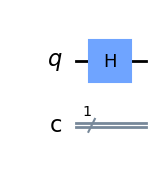

In [1]:
# qiskit contains the class QuantumCircuit with which you can build quantum circuits.
# So, the first step is to import this class
from qiskit import QuantumCircuit

# The QuantumCircuit class is initialized by specifying the number of qubits in the circuit.
# When we measure the quantum circuit later, we will need a classical bit to store the output 
#from each qubit.
circ = QuantumCircuit(1,1)
# The first argument '1' to QuantumCircuit specifies that we will be using just 1 qubit. 
# The second argument '1' specifies that we will be storing a single classical bit 
# of output from our future measurement, i.e. we will measure a single qubit.

#To add a Hadamard gate we use the function 'h' of QuantumCircuit:
circ.h(0)

# In the above line, circ is the circuit we just created, and we are inserting the hadamard gate using '.h(0)'
# The '0' in the argument specifies that we want the gate to be applied on the zeroth qubit.
# And yes, the qubit numbering starts at 0, as is typical in Python.

# At this point we already have a quantum circuit ready. We can "draw" it by using the function 'draw'
circ.draw(output='mpl')

The circuit above is the quantum circuit we specified. The bottom wire just reminds us that we will be storing one bit from the output of our measurement.

In [ ]:
# So far we have only drawn the quantum circuit.
# To actually run the circuit and measure its output we will make use of two additional modules in qiskit: 
# "Aer" and "execute".
# But first, let's add the measurement operation in our circuit.
circ.measure(0,0)
# The first argument specifies that we are measuring the first qubit (Python starts counting
# from zero), and the second argument specifies that we are storing the output 
# of this measurement in the first output bit.

# Import Aer and execute
from qiskit import Aer, execute
# The Aer module contains many simulators. We will be using one called qasm_simulator. 
# By convention, we refer to the simulator (or the actual quantum computer) as a backend.
# and if you wanted to run your quantum circuit on an actual quantum computer, you would just need to replace
# 'qasm_simulator' with the name of the quantum computer.
backend_sim = Aer.get_backend('qasm_simulator')

# Once you specify the backend, you can just go ahead and execute the circuit with the function execute.
sim = execute(circ, backend_sim, shots=1000)
# Shots specifies how many times the quantum circuit is run.

# The results from the execution are stored in 'sim' and can be obtained using
sim_result = sim.result()

# From the result object we can get the count of the 0s and 1s from the circuit
counts = sim_result.get_counts(circ)
print(counts)

We ran the quantum circuit 1000 times. As you could expect, we got outcomes '0' and '1' roughly with a 50-50 split

In [ ]:
# We can plot the outcomes stored in the variable 'counts' using the following code:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

<h2 style="color:MediumSeaGreen;">More single qubit gates</h2>

In [ ]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(1) # we omit the second argument as we will just draw the circuit, 
# without measuring.

circ.h(0) # Adds a Hadamard on the zeroth qubit.

circ.x(0) # Pauli X

circ.y(0) # Pauli Y

circ.z(0) # Pauli Z

circ.draw(output='mpl')

<h2 style="color:MediumSeaGreen;">Circuits of multiple qubits</h2>

Next, we'll build a circuit involving multiple qubits and multi-qubit gates.

In [ ]:
from qiskit import QuantumCircuit

circ = QuantumCircuit(3) # the first argument specifies that we are building a circuit 
# of 3 qubits.

circ.h(2) # Adds a Hadamard on the third qubit (Python starts counting from zero..)

circ.x(1) # Adds a Pauli X on the second qubit

circ.cx(0,1) # Adds a CNOT gate on control qubit 0 and target qubit 1.

circ.cz(1,2) # Adds a Controlled-Z gate on control qubit 1 and target qubit 2. 

circ.draw(output='mpl')

Here's another example. We'll run a circuit that creates the EPR pair $\frac{1}{\sqrt{2}}\left| 00 \right\rangle + \frac{1}{\sqrt{2}}\left| 11 \right\rangle$ and then measures both qubits.

In [ ]:
circ = QuantumCircuit(2,2) # the first argument specifies that we are building a circuit 
# of 3 qubits.
# The second argument specifies that we'll be measuring all 3 qubits.

circ.h(0) # Adds a Hadamard on the first qubit (Python starts counting from zero..)

circ.cx(0,1) # Adds a CNOT gate on control qubit 0 and target qubit 1. 

circ.draw(output='mpl')

Next, we measure both qubits and plot the outputs.

In [ ]:
circ.measure([0,1],[1,0])
# The first argument specifies the list of qubits that we are measuring,
# The second argument specifies the list of output bits (created earlier) in which we will store the outcomes,
# Notice that we have reversed the second list: this is because by convention qiskit orders the classical bits in reverse relative to the qubits.
# We recommend always reversing the list of classical bits, so that the qubits and classical output bits are ordered in the same way.

# Import Aer and execute
from qiskit import Aer, execute

backend_sim = Aer.get_backend('qasm_simulator')

# We go ahead and execute the circuit with the function execute.
sim = execute(circ, backend_sim, shots=1000)
# Recall that shots specifies how many times the quantum circuit is run.

# The results from the execution are stored in 'sim' and can be obtained using
sim_result = sim.result()
# From the result object we can get the count of the 0s and 1s from the circuit
counts = sim_result.get_counts(circ)
print(counts)

# We plot the outcomes stored in the variable 'counts':
from qiskit.visualization import plot_histogram
plot_histogram(counts)

As expected, the output is roughly evenly split between the strings '00' and '11'.

<h1 style="color:MediumSeaGreen;">Running on actual quantum devices!</h1>

Current quantum devices are relatively small and noisy, and, most importantly, so far still unable to demonstrate a speedup on a useful computational problem. Nonetheless, it is very exciting to live in a time where quantum devices are coming to life, and we can even interact with some of them remotely! Let's see how to do this.

One convenient feature of the qBraid SDK is that it allows you to write your quantum circuit *once*, and run it most of the available quantum devices (from IBM, Rigetti, Xanadu, QuEra, Oxford Quantum Circuits, IonQ).

<h2 style="color:MediumSeaGreen;">Installing the qBraid-SDK environment in your workspace</h2>

- At the very top of the right sidebar, click on the "ENVS" icon;
- In the window that opens, click on "ADD" at the top right;
- Look for qBraid-SDK in the list of environments. Click on the dropdown arrow on qBraid-SDK, and then on "install". This will install the environment in your virtual workspace. You can track the progress of the installation, by clicking on "Browse Environments" at the top, which will take you back to the page "My Environments".  
- Once the installation is complete, click on "Activate".

<h2 style="color:MediumSeaGreen;">Switching the "kernel" of your Jupyter notebook</h2>

Each Jupyter notebook uses a "kernel", i.e. a backend, to run code that appears in the notebook. We want to switch to a kernel where all of the necessary packages to run on quantum devices are already installed.

Once you have completed the steps above, open the Jupyter notebook on which you plan to run your code on quantum devices. At the top right of the Jupyter notebook, click where it says "Python [Default]." (this is most likely what you will see unless you have already switched to a different kernel). A dropdown menu will appear (where Python 3[Default] is one of the options). You should now also see the option Python 3[qBraid-SDK]. Select this.

There is a bit more boilerplate that you need to run in order to set up things correctly. Run the following cells.

In [ ]:
! qbraid jobs enable qbraid_sdk

<h2 style="color:MediumSeaGreen;">Getting information about available quantum devices</h2>

We can obtain information about the supported quantum devices using the "get_devices" function, as in the cell below. This returns information about the current status of supported devices (whether they are currently available to run quantum jobs or not), as well as their "qBraid ID", which you will need to include in your code when submitting a quantum job. You can also see the status of quantum devices by clicking on the "DEVICES" in the sidebar on the right. The "qBraid ID"'s returned by the "get_devices" function are more accurate than those displayed by clicking on "DEVICES" in the sidebar, so you should refer to the former when submitting quantum jobs.

Sometimes you might get the error "No module named qbraid" when running the cell above. If you do, just switch your kernel back to Python3[Default] momentarily, and then switch back to Python3[qBraid-SDK]. This should fix the issue.

In [ ]:
from qbraid import device_wrapper, get_devices
get_devices() 

Sometimes you might get the error "No module named qbraid" when running the cell above. If you do, just switch your kernel back to Python3[Default] momentarily, and then switch back to Python3[qBraid-SDK]. This should fix the issue.

We will now run the circuit we specified earlier (that creates an EPR pair and measures both qubits) on an IBM quantum device. In particular, we will use the function "least_busy_QPU" to select the IBM device with the shorter queue (meaning our quantum job will get completed sooner).

In [ ]:
from qbraid.devices.ibm import ibm_least_busy_qpu

ibm_device_id = ibm_least_busy_qpu()

print(ibm_device_id)

In order to run our circuit on the latter quantum device, we need to create a "device_wrapper" object corresponding to that device. We do this by running the following cell:

In [ ]:
qbraid_ibm_device = device_wrapper(ibm_device_id)

The "device_wrapper" we created allows us to run *any* quantum circuit on that device, whether the circuit is written in Qiskit or not. The "device_wrapper" handles transpilation between different "languages".

Finally, let's submit the circuit "circ", which we created earlier in this notebook to the chosen device. We do this by calling the method "run" of a "device_wrapper" object. The "run" method takes as input the circuit we wish to run, and the number of "shots" of that circuit that we wish to run. We can then retrieve the status of our submitted job by calling the function "status".

In [ ]:
qbraid_ibm_job = qbraid_ibm_device.run(circ, shots=250)

Our job has entered the queue.

In [2]:
qbraid_ibm_job.status()

NameError: name 'qbraid_ibm_job' is not defined

We can run our circuit on other devices by just modifying the entry for the "qBraid ID" of the device.

In [ ]:
device_2 = device_wrapper('aws_ionq')

quantum_job2 = device_2.run(circ, shots = 250)

In [ ]:
quantum_job2.status()

Status of (reconstructed) task: COMPLETED
250 shots taken on machine arn:aws:braket:::device/qpu/ionq/ionQdevice.
Measurement counts: Counter({'11': 128, '00': 119, '01': 2, '10': 1})


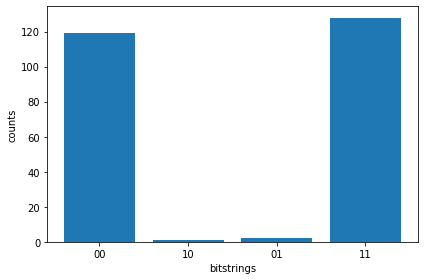

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit, Gate, Instruction, circuit, Observable
from braket.devices import LocalSimulator
from braket.aws import AwsDevice, AwsQuantumTask

# recover task
task_load = AwsQuantumTask(arn='arn:aws:braket:us-east-1:592242689881:quantum-task/d45a69ef-e188-461e-8600-c28e4c31bf8f')

# print status
status = task_load.state()
print('Status of (reconstructed) task:', status)

# wait for job to complete
# terminal_states = ['COMPLETED', 'FAILED', 'CANCELLED']
if status == 'COMPLETED':
    # get results
    results = task_load.result()
    # print(rigetti_results)
    
    # get all metadata of submitted task
    metadata = task_load.metadata()
    # example for metadata
    shots = metadata['shots']
    machine = metadata['deviceArn']
    # print example metadata
    print("{} shots taken on machine {}.".format(shots, machine))
    
    # get measurement counts
    counts = results.measurement_counts
    print('Measurement counts:', counts)

    # plot results: see effects of noise
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('bitstrings')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.savefig('bell_ionq.png', dpi=700)
    
elif status in ['FAILED', 'CANCELLED']:
    # print terminal message 
    print('Your task is in terminal status, but has not completed.')

else:
    # print current status
    print('Sorry, your task is still being processed and has not been finalized yet.')

We can call "status" to check if the job has been completed. Once it has, we can plot the results.

In [ ]:
ibm_result = qbraid_ibm_job.result()
ibm_counts = ibm_result.measurement_counts()
ibm_result.plot_counts()

In [ ]:
job2_result = quantum_job2.result()
job2_counts = job2_result.measurement_counts()
job2.plot_counts()